In [48]:
import argparse
import uuid
import os
import shutil
import pandas as pd
from qiime2 import Visualization
import seaborn as sns; sns.set_theme(color_codes=True)

def save_long_wide(df, filename):
    """
    Generates tsv for a dataframe and for its transposed
    """
    df.to_csv(f"{filename}_wide.tsv", sep="\t")
    df.transpose().to_csv(f"{filename}_long.tsv", sep="\t")
    return

def export_qzv(qzv_in):
    # generate the tmp dir
    # export qzv to a tmp dir
    # get the needed dataframes
    # remove the tmp dir

    tmpdir = str(uuid.uuid4())

    while tmpdir in os.listdir():
        tmpdir = str(uuid.uuid4())


    qzv = Visualization.load(qzv_in)
    qzv.export_data(tmpdir)
    
    # ancom table
    df_ancom = pd.read_csv(f"{tmpdir}/ancom.tsv", sep="\t", index_col=0)
    
    # Data table
    df_data = pd.read_csv(f"{tmpdir}/data.tsv", sep="\t", index_col=0)
    
    # Add extra row to avoid NAs
    df_data.loc["Group"] = 2 * ["-"]
    
    # remove the "w"
    df_ancom.drop(["W"], axis=1, inplace=True)

    # Percent abundances
    df_percent_abundances = pd.read_csv(f"{tmpdir}/percent-abundances.tsv", sep = "\t", index_col=0)

    shutil.rmtree(tmpdir)

    return df_ancom, df_data, df_percent_abundances

def get_significative_taxa(df):
    # Get differentially expressed taxa
    # Those with "Reject null hypothesis" set as True
    significative_taxa = df[df["Reject null hypothesis"] == True].index

    if len(significative_taxa) == 0:
        print("No significative data found.")
        return None
    else:
        return list(significative_taxa)

<IPython.core.display.Javascript object>


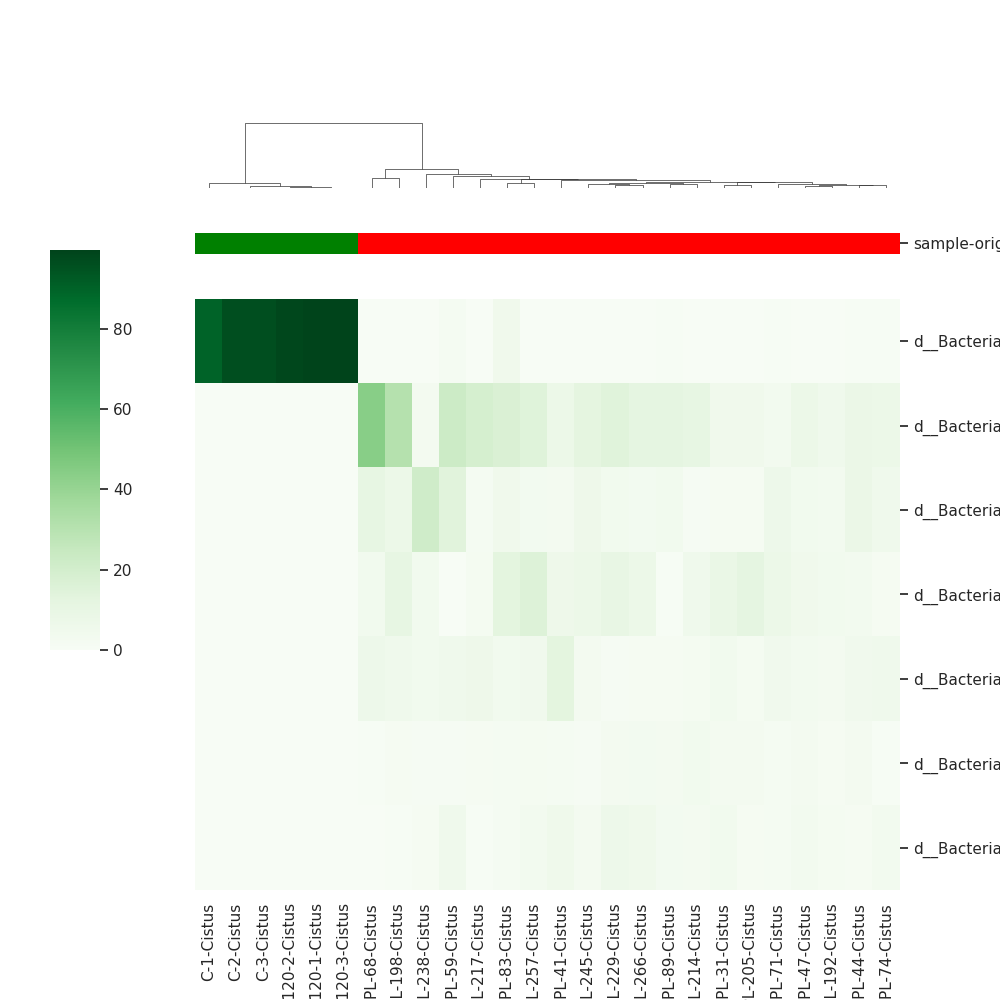

In [139]:
qzv_in = "Assets/ancom_sample-origin_clean_full_6.qzv"
metadata = "Assets/metadata.tsv"
metadata_column = "sample-origin"
rel_freq_in = "Assets/relative_numbers_lvl_6_clean_long.tsv"


# generate the path where the relative abundances will be
# rel_abundances_path = f"../../09-qiime2_collapse_numbers/{args.mode}/{args.state}/lvl_{args.level}/{args.state}/relative_numbers_lvl_{args.level}_{args.state}_long.tsv"

df_ancom, df_data, df_percent_abundances = export_qzv(qzv_in)

df_out_1 = pd.concat([df_ancom, df_data, df_percent_abundances], axis=1)

# get the significative data 
significative_taxa = get_significative_taxa(df_out_1)

# if there are any significative taxa
# generate the heatmap with dendrogram plot
if significative_taxa is not None:
    
    # import relative abundances
    rel_abs_df = pd.read_csv(rel_freq_in, header=0, index_col=0, delimiter="\t")
        
    sig_tax_abundances = rel_abs_df.loc[significative_taxa, :]
    
    # Import metadata
    metadata_df = pd.read_csv(metadata, header=0, index_col=0, delimiter="\t")
    column_df = metadata_df.pop(metadata_column)
    
    # associate color code to metadata
    color_codes = dict(zip(column_df.unique(), ["green", "red", "blue", "purple", "grey"]))
    col_colors = column_df.map(color_codes)
    
    
    
    figure = sns.clustermap(sig_tax_abundances,
                  col_colors=col_colors,
                  row_cluster=False,
                  dendrogram_ratio=(0, .1),
                  cbar_pos=(.05, .35, .05, .4),
                  cmap="Greens",
                  figsize=(10,10)
                  )

    figure.savefig("figure.png")


In [74]:
sig_tax_abundances

,C-1-Cistus,C-11-AND-PL-31-Cistus,C-14-AND-PL-41-Cistus,C-15-AND-PL-44-Cistus,C-16-AND-PL-47-Cistus,C-2-Cistus,C-20-AND-PL-59-Cistus,C-23-BAD-PL-68-Cistus,C-24-BAD-PL-71-Cistus,C-25-BAD-PL-74-Cistus,...,T120-16-AND-2-PL-229-Cistus,T120-19-AND-PL-238-Cistus,T120-2-Cistus,T120-21-BAD-PL-245-Cistus,T120-25-BAD-PL-257-Cistus,T120-28-BAD-PL-266-Cistus,T120-3-Cistus,T120-4-VALD-PL-192-Cistus,T120-6-VALD-PL-198-Cistus,T120-8-VALD-3-PL-205-Cistus
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea,90.164792,0.272116,0.097571,1.026216,0.200013,96.359841,1.978869,0.000000,1.058460,0.553210,...,0.050939,0.000000,98.617103,0.000000,0.026739,0.000000,99.639965,0.205687,0.014708,0.117192
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__uncultured,0.000000,5.139395,7.568735,8.272673,8.089055,0.000000,22.593544,44.009604,3.778156,8.029723,...,14.483649,2.795156,0.000000,12.715952,14.997159,12.225651,0.000000,5.496992,31.078100,5.097855
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Variovorax,0.000000,1.871438,3.014252,8.461496,4.498656,0.000000,14.295721,11.101441,6.930465,5.731775,...,4.669406,21.703561,0.000000,6.248200,3.476052,3.433439,0.000000,3.722939,7.833505,1.777413
d__Bacteria;p__Chloroflexi;c__Chloroflexia;o__Chloroflexales;f__Roseiflexaceae;g__uncultured,0.000000,9.308415,6.502422,3.874993,5.354449,0.000000,0.000000,4.579832,7.625530,1.669449,...,10.357592,4.182708,0.000000,8.015405,15.715766,7.566604,0.000000,4.113745,10.981027,12.250479
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium,0.061311,4.510448,13.064083,4.975097,3.737950,0.000000,5.557177,6.680672,5.015430,5.731775,...,1.412708,4.487488,0.000000,3.098906,4.696013,1.668912,0.000000,2.828200,5.809678,2.386812
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae;g__Bradyrhizobium,0.000000,2.780202,2.108234,2.840567,2.826415,0.000000,1.421400,0.702281,2.065007,0.837998,...,2.764288,1.219121,0.000000,1.241722,2.640463,3.368247,0.000000,1.846043,1.667892,2.793078
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae;g__Niastella,0.000000,4.194691,6.011081,1.841716,3.626467,0.000000,5.545502,0.063025,2.142878,3.548398,...,6.819031,1.680302,0.000000,2.774978,3.853738,6.114998,0.000000,2.437394,1.044271,1.769600


# Abs_count, Rel_count, Prevalence, Cleaning, Repeat

In [2]:
from qiime2 import Artifact
import pandas as pd

import sys
import os

In [47]:
def save_long_wide(df, filename):
    """
    Generates tsv for a dataframe and for its transposed
    """
    
    df.to_csv(f"{filename}_wide.tsv", sep="\t")
    df.transpose().to_csv(f"{filename}_long.tsv", sep="\t")
    return

def relative_abundances(df):
    """
    Obtain the relative abundance of the otus
    """
    
    df["Total"] = df.sum(axis=1)
    rownum, colnum = df.shape
    for row in range(rownum):
        for col in range(colnum-1):
            df.iloc[row, col] = df.iloc[row, col] * 100 / df.iloc[row, colnum-1]

    df.drop("Total", axis=1, inplace=True)   
    
    return df
    
def normalize_dataframe(dataframe, criteria=0):
    """
    Change the dataframe to an absence-presence matrix
    based on a criteria (by now, a number)
    """
    
    row_number, col_number = dataframe.shape
    
    for row in range(0, row_number):
        for col in range(0, col_number):
            if dataframe.iloc[row, col] >= criteria:
                
                print(f"{dataframe.iloc[row, col]} is considered 1")
                
                dataframe.iloc[row, col] = 1
            else:
                print(f"{dataframe.iloc[row, col]} is considered 0")

                dataframe.iloc[row, col] = 0
                
    return dataframe

def create_category_dict(metadata):
    """
    Create, from the metadata dataframe, a dict with
    key: category; val: values in that category
    if only one category, it wont be taken into account
    """
    valid_categories = dict()
    category_names_list = list(metadata.columns)

    # get all different possibilities for each metadata column
    for col_index in range(metadata.shape[1]):
        
        # list from a set to avoid repeating
        groups = (list(set(metadata[category_names_list[col_index]])))
        
        # if more than 1 different category, add it to the dict
        if len(groups) > 1:
            category_name = category_names_list[col_index]
            valid_categories[category_name] = [item for item in groups]

    return valid_categories, category_names_list

def prevalences(df, metadata):
    """
    Calculate the prevalence for each group
    """
    
    df_prev = pd.concat([df, metadata], axis=1)
    category_dict, category_names_list = create_category_dict(metadata)
    
    for category, values in category_dict.items():
    
        prevalence_per_value = []

        for value in values:

            # Drop metadata columns
            sub_df = df_prev[df_prev[category] == value].drop(category_names_list, axis=1)
            
            # Normalize (0: absence, 1: presence)
            norm_df = normalize_dataframe(sub_df, criteria=1)
            norm_df.loc["Prevalence"] = norm_df.sum(axis=0)
            
            
            norm_df.transpose().to_csv("normalizada.tsv",sep="\t")


            row_number, col_number = norm_df.shape
        
            for column in range(0, col_number):
                # Get the relative abundance of each taxon on each group
                norm_df.iloc[row_number-1, column] = norm_df.iloc[row_number-1, column]*100/(row_number-1)
                norm_df.rename({"Prevalence":value}, axis=0, inplace=True)

            prevalence_per_value.append(norm_df.loc[value].to_frame().transpose())        
        
        prevalence_df = pd.concat(prevalence_per_value)
        
        save_long_wide(prevalence_df, f"prevalence")  
    

def clean_dataframe(df):
    """
    Remove the columns ending with ;__
    """
    
    df = df.loc[:,~df.columns.str.endswith(";__")]

    return df


def artifact_from_df(df_in, filename):
    
    clean_qza = Artifact.import_data("FeatureTable[Frequency]", df_in)
    clean_qza.save(f"{filename}.qza")
    
    return

In [30]:
qza_in = "Assets/collapsed_raw_full_table_lvl_5.qza"

In [49]:
df = Artifact.load(qza_in).view(pd.DataFrame)

In [32]:
save_long_wide(df,"absolute_numbers")

In [33]:
rel_df = relative_abundances(df)
save_long_wide(rel_df,"relative_numbers")

In [50]:
metadata_file = "Assets/metadata.tsv"

metadata = pd.read_csv(
    metadata_file,
    sep='\t',
    header=0,
    index_col=0
    )
prevalences(df, metadata)

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
468.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
48.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
59.0 is considered 1
0.0 is considered 0
138.0 is considered 1
0.0 is considered 0
0.0 is considered 0
47.0 is considered 1
0.0 is considered 0
102.0 is considered 1
113.0 is considered 1
0.0 is considered 0
48.0 is considered 1
0.0 is considered 0
129.0 is considered 1
0.0 is considered 0
41.0 is considered 1
0.0 is considered 0
0.0 is considered 0
313.0 is considered 1
229.0 is considered 1
52.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
140.0 is considered 1
0.0 is considered 0
104.0 is considered 1
0.0 is considered 0
0.0 is considered 0
434.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is conside

0.0 is considered 0
0.0 is considered 0
382.0 is considered 1
28.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
159.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
15.0 is considered 1
11.0 is considered 1
45.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
6.0 is considered 1
0.0 is considered 0
0.0 is considered 0
207.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
713.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
33.0 is considered 1
0.0 is considered 0
141.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
360.0 is considered 1
0.0 is considered 0
110.0 is considered 1
128.0 is considered 1

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
394.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
8.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 

12.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
38.0 is considered 1
983.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
141.0 is considered 1
12.0 is considered 1
14.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
137.0 is considered 1
14.0 is considered 1
468.0 is considered 1
42.0 is considered 1
0.0 is considered 0
424.0 is considered 1
41.0 is considered 1
564.0 is considered 1
2009.0 is considered 1
146.0 is considered 1
9.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
391.0 is considered 1
0.0 is considered 0
116.0 is considered 1
219.0 is considered 1
206.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
150.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is

0.0 is considered 0
0.0 is considered 0
29.0 is considered 1
0.0 is considered 0
0.0 is considered 0
5.0 is considered 1
56.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
13.0 is considered 1
18.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
131.0 is considered 1
0.0 is considered 0
509.0 is considered 1
599.0 is considered 1
0.0 is considered 0
0.0 is considered 0
10.0 is considered 1
0.0 is considered 0
21.0 is considered 1
48.0 is considered 1
269.0 is considered 1
0.0 is considered 0
13.0 is considered 1
0.0 is considered 0
74.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
15.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
356.0 is considered 1
61.0 is considered 1
0.0 is considered 0
0.0 is considered 0
83.0 is considered 1
0.0 is considered 

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0


2.0 is considered 1
192.0 is considered 1
149.0 is considered 1
0.0 is considered 0
5.0 is considered 1
19.0 is considered 1
0.0 is considered 0
16.0 is considered 1
0.0 is considered 0
18.0 is considered 1
0.0 is considered 0
0.0 is considered 0
11.0 is considered 1
0.0 is considered 0
0.0 is considered 0
1234.0 is considered 1
6.0 is considered 1
0.0 is considered 0
62.0 is considered 1
0.0 is considered 0
321.0 is considered 1
0.0 is considered 0
763.0 is considered 1
209.0 is considered 1
31.0 is considered 1
78.0 is considered 1
80.0 is considered 1
2.0 is considered 1
26.0 is considered 1
0.0 is considered 0
3.0 is considered 1
0.0 is considered 0
0.0 is considered 0
4.0 is considered 1
132.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
34.0 is considered 1
40.0 is considered 1
26.0 is considered 1
0.0 is considered 0
3.0 is considered 1
0.0 is considered 0
159.0 is considered 1
0.0 is considered 0
0.0 is considered 0
60.0 is con

14.0 is considered 1
0.0 is considered 0
0.0 is considered 0
33.0 is considered 1
0.0 is considered 0
13.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
13.0 is considered 1
17.0 is considered 1
19.0 is considered 1
14.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
14.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
12.0 is considered 1
91.0 is considered 1
0.0 is considered 0
0.0 is considered 0
17.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
10.0 is considered 1
0.0 is considered 0
0.0 is considered 0
13.0 is considered 1
0.0 is considered 0
31.0 is considered 1
0.0 is considered 0
0.0 is considered 0
48.0 is considered 1
0.0 is considered 0
0.0 is considered 0
14.0 is considered 1
0.0 

4.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
27.0 is considered 1
0.0 is considered 0
20.0 is considered 1
8.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
116.0 is considered 1
7.0 is considered 1
0.0 is considered 0
26.0 is considered 1
0.0 is considered 0
0.0 is considered 0
20.0 is considered 1
5.0 is considered 1
115.0 is considered 1
41.0 is considered 1
28.0 is considered 1
0.0 is considered 0
25.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
29.0 is considered 1
0.0 is considered 0
0.0 is considered 0
81.0 is considered 1
0.0 is considered 0
32.0 is considered 1
0.0 is considered 0
46.0 is considered 1
17.0 is considered 1
0.0 is considered 0
106.0 is considered 1
0.0 is considered 0
0.0 is considered 0
58.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
196.0 is considered 1
0.0 is considered 0

539.0 is considered 1
0.0 is considered 0
632.0 is considered 1
208.0 is considered 1
0.0 is considered 0
163.0 is considered 1
178.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
71.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
120.0 is considered 1
123.0 is considered 1
604.0 is considered 1
36.0 is considered 1
0.0 is considered 0
22.0 is considered 1
0.0 is considered 0
0.0 is considered 0
25.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
471.0 is considered 1
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
175.0 is considered 1
0.0 is considered 0
124.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
276.0 is considered 1
0.0 is considered 0
0.0 is considered 0
30.0 is cons

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
44.0 is considered 1
4.0 is considered 1
1744.0 is considered 1
0.0 is considered 0
471.0 is considered 1
45.0 is considered 1
195.0 is considered 1
1485.0 is considered 1
0.0 is considered 0
0.0 is considered 0
561.0 is considered 1
0.0 is considered 0
15.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
104.0 is considered 1
0.0 is considered 0
58.0 is considered 1
54.0 is considered 1
0.0 is considered 0
67.0 is considered 1
2.0 is considered 1
0.0 is considered 0
2.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
2.0 is considered 1
0.0 is considered 0
2962.0 is considered 1
22.0 is considered 1
26.0 is considered 1
13.0 is considered 1
9.0 is considered 1
10.0 is considered 1
5.0 is considered 1
485.0 is considered 1
604.0 is considered 1
31.0 is considered 1
15.0 is considered 1
61.0 is considered 1
0.0 is

24.0 is considered 1
0.0 is considered 0
16.0 is considered 1
0.0 is considered 0
19.0 is considered 1
0.0 is considered 0
20.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
8.0 is considered 1
291.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
5.0 is considered 1
0.0 is conside

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
64.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0

5.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
21.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
4.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0

0.0 is considered 0
0.0 is considered 0
84.0 is considered 1
12.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
31.0 is considered 1
22.0 is considered 1
95.0 is considered 1
0.0 is considered 0
3.0 is considered 1
36.0 is considered 1
99.0 is considered 1
54.0 is considered 1
41.0 is considered 1
236.0 is considered 1
0.0 is considered 0
45.0 is considered 1
0.0 is considered 0
141.0 is considered 1
74.0 is considered 1
0.0 is considered 0
73.0 is considered 1
73.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
4.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
99.0 is considered 1
0.0 is considered 0
24.0 is considered 1
46.0 is considered 1
18.0 is considered 1
26.0 is considered 1
0.0 is considered 0
138.0 is considered 1
0.0 is considered 0
0.0 is considered 0
677.0 is considered 1
15.0 is considered 1
0.0 is considered 0
43.0 is considered 1
0.0 is consi

0.0 is considered 0
48.0 is considered 1
0.0 is considered 0
164.0 is considered 1
0.0 is considered 0
22.0 is considered 1
14.0 is considered 1
0.0 is considered 0
34.0 is considered 1
36.0 is considered 1
0.0 is considered 0
4.0 is considered 1
68.0 is considered 1
0.0 is considered 0
0.0 is considered 0
15.0 is considered 1
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
8.0 is considered 1
0.0 is considered 0
6.0 is considered 1
0.0 is considered 0
0.0 is considered 0
42.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
20.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
7.0 is considered 1
5.0 is considered 1
0.0 is considered 0
26.0 is considered 1
38.0 is considered 1
0.0 is considered 0
0.0 is 

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
806.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
34.0 is considered 1
0.0 is considered 0
579.0 is considered 1
0.0 is considered 0
11.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
79.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
101.0 is considered 1
226.0 is considered 1
0.0 is considered 0
0.0 is considered 0
200.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
230.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 i

87.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
20.0 is considered 1
0.0 is considered 0
25.0 is considered 1
321.0 is considered 1
266.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
202.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
29.0 is considered 1
0.0 is considered 0
20.0 is considered 1
0.0 is considered 0
0.0 is considered 0
73.0 is considered 1
44.0 is considered 1
1144.0 is considered 1
0.0 is considered 0
185.0 is considered 1
298.0 is considered 1
100.0 is considered 1
1223.0 is considered 1
88.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
101.0 is considered 1
0.0 is considered 0
160.0 is considered 1
0.0 is considered 0
495.0 is considered 1
211.0 is considered 1
113.0 is considered 1
69.0 is considered 1
86.0 is considered 1
0.

12.0 is considered 1
0.0 is considered 0
43.0 is considered 1
0.0 is considered 0
98.0 is considered 1
10.0 is considered 1
0.0 is considered 0
15.0 is considered 1
0.0 is considered 0
896.0 is considered 1
135.0 is considered 1
0.0 is considered 0
0.0 is considered 0
359.0 is considered 1
0.0 is considered 0
0.0 is considered 0
23.0 is considered 1
0.0 is considered 0
0.0 is considered 0
15.0 is considered 1
48.0 is considered 1
12.0 is considered 1
0.0 is considered 0
0.0 is considered 0
24.0 is considered 1
526.0 is considered 1
201.0 is considered 1
151.0 is considered 1
0.0 is considered 0
743.0 is considered 1
232.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
121.0 is considered 1
1302.0 is considered 1
378.0 is considered 1
2299.0 is considered 1
0.0 is considered 0
23.0 is considered 1
0.0 is considered 0
11.0 is considered 1
0.0 is considered 0
266.0 is considered 1
283.0 is considered 1
0.0 is considered 

0.0 is considered 0
85.0 is considered 1
0.0 is considered 0
7.0 is considered 1
34.0 is considered 1
0.0 is considered 0
0.0 is considered 0
373.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
109.0 is considered 1
0.0 is considered 0
1963.0 is considered 1
0.0 is considered 0
166.0 is considered 1
24.0 is considered 1
49.0 is considered 1
2016.0 is considered 1
0.0 is considered 0
0.0 is considered 0
480.0 is considered 1
0.0 is considered 0
14.0 is considered 1
0.0 is considered 0
2.0 is considered 1
42.0 is considered 1
9.0 is considered 1
180.0 is considered 1
14.0 is considered 1
82.0 is considered 1
74.0 is considered 1
0.0 is considered 0
88.0 is considered 1
20.0 is considered 1
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
18.0 is considered 1
2.0 is considered 1
10.0 is considered 1
4547.0 is considered 1
0.0 is considered 0
4.0 is c

0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
14.0 is considered 1
0.0 is considered 0
0.0 is considered 0
1230.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
41.0 is considered 1
0.0 is considered 0
13.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
46.0 is considered 1
730.0 is considered 1
68.0 is considered 1
89.0 is considered 1
0.0 is considered 0
280.0 is considered 1
66.0 is considered 1
0.0 is considered 0
0.0 is considered 0
21.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
1240.0 is considered 1
25.0 is considered 1
816.0 is considered 1
22.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
35.0 is considered 1
118.0 is considered 1
0.0 is considered 0
0.0 is considered 0
41.0 is considered 1
596.0 is considered 1
9.0 is consi

81.0 is considered 1
6.0 is considered 1
0.0 is considered 0
0.0 is considered 0
8.0 is considered 1
0.0 is considered 0
48.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
115.0 is considered 1
49.0 is considered 1
0.0 is considered 0
0.0 is considered 0
87.0 is considered 1
14.0 is considered 1
11.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
0.0 is considered 0
12.0 is considered 1
0.0 is considered 0
71.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
22.0 is considered 1
16.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
4.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
193.0 is

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
16.0 is considered 1
0.0 is considered 0
13.0 is considered 1
0.0 is considered 0
0.0 is considered 0
77.0 is considered 1
364.0 is considered 1
150.0 is considered 1
59.0 is considered 1
0.0 is considered 0
909.0 is considered 1
179.0 is considered 1
5.0 is considered 1
0.0 is considered 0
44.0 is considered 1
0.0 is considered 0
0.0 is considered 0
33.0 is considered 1
505.0 is considered 1
115.0 is considered 1
1634.0 is considered 1
5.0 is considered 1
0.0 is considered 0
0.0 is considered 0
39.0 is considered 1
0.0 is considered 0
59.0 is considered 1
802.0 is considered 1
0.0 is considered 0
0.0 is considered 0
128.0 is considered 1
310.0 is considered 1
0.0 is considered 0
17.0 is considered 1
85.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
92.0 is considered 1
146.0 is considered 1
0.0 is considered 0
9371.0 is considered 1
462.0 is considered 1
0

0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
2.0 is considered 1
124.0 is considered 1
0.0 is considered 0
0.0 is considered 0
22.0 is considered 1
0.0 is considered 0
5.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
50.0 is considered 1
0.0 is considered 0
0.0 is considered 0
11.0 is considered 1
57.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
2.0 is considered 1
13.0 is considered 1
70.0 is considered 1
269.0 is considered 1
611.0 is considered 1
0.0 is considered 0
0.0 is considered 0
790.0 is considered 1
14.0 is considered 1
0.0 is considered 0
148.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
26.0 is considered 1
68.0 is considered 1
34.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
251.0 is considered 1
0.0 is considered 0
7.0 is considered 1
15.0 is considered 1
0.0 is considered 0
0.0 is considered 0
13.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
346.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is cons

195.0 is considered 1
0.0 is considered 0
48.0 is considered 1
0.0 is considered 0
0.0 is considered 0
73.0 is considered 1
95.0 is considered 1
0.0 is considered 0
0.0 is considered 0
79.0 is considered 1
320.0 is considered 1
1316.0 is considered 1
136.0 is considered 1
1356.0 is considered 1
0.0 is considered 0
886.0 is considered 1
1518.0 is considered 1
0.0 is considered 0
0.0 is considered 0
215.0 is considered 1
120.0 is considered 1
265.0 is considered 1
1048.0 is considered 1
2638.0 is considered 1
976.0 is considered 1
3850.0 is considered 1
0.0 is considered 0
67.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
341.0 is considered 1
125.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
1213.0 is considered 1
0.0 is considered 0
98.0 is considered 1
67.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
64.0 is considered 1
327.0 is considered 1
0.0 is considered 0
7580.0 is considered 1
468.0 

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
31.0 is considered 1
22.0 is considered 1
95.0 is considered 1
0.0 is considered 0
3.0 is considered 1
36.0 is considered 1
99.0 is considered 1
54.0 is considered 1
41.0 is considered 1
236.0 is considered 1
0.0 is considered 0
45.0 is considered 1
0.0 is considered 0
141.0 is considered 1
74.0 is considered 1
0.0 is considered 0
73.0 is considered 1
73.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
4.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
99.0 is considered 1
0.0 is considered 0
24.0 is considered 1
46.0 is considered 1
18.0 is considered 1
26.0 is considered 1
0.0 is considered 0
138.0 is considered 1
0.0 is considered 0
0.0 is considered 0
677.0 is considered 1
15.0 is considered 1
0.0 is considered 0
43.0 is considered 1
0.0 is considered 0
0.0 is considered 0
211.0 is considered 1
19.0 is considered 1
1598.0 is considered 1
0.0 is c

0.0 is considered 0
1911.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
325.0 is considered 1
0.0 is considered 0
161.0 is considered 1
1502.0 is considered 1
0.0 is considered 0
167.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
259.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is

72.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
21.0 is considered 1
0.0 is considered 0
67.0 is considered 1
340.0 is considered 1
0.0 is considered 0
0.0 is considered 0
41.0 is considered 1
0.0 is considered 0
21.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
171.0 is considered 1
0.0 is considered 0
1663.0 is considered 1
0.0 is considered 0
437.0 is considered 1
204.0 is considered 1
0.0 is considered 0
1501.0 is considered 1
0.0 is considered 0
141.0 is considered 1
89.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
97.0 is considered 1
125.0 is considered 1
36.0 is considered 1
96.0 is considered 1
349.0 is considered 1
0.0 is considered 0
30.0 is considered 1
33.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is co

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
13.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0


92.0 is considered 1
9.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
29.0 is considered 1
760.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
25.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
12.0 is considered 1
0.0 is considered 0
34.0 is considered 1
0.0 is considered 0
106.0 is considered 1
0.0 is considered 0
0.0 is considered 0
620.0 is considered 1
19.0 is considered 1
0.0 is considered 0
0.0 is considered 0
300.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
109.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
45.0 is considered 1
572

27.0 is considered 1
10.0 is considered 1
85.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
191.0 is considered 1
132.0 is considered 1
100.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
13.0 is considered 1
0.0 is considered 0
18.0 is considered 1
0.0 is considered 0
0.0 is considered 0
246.0 is considered 1
103.0 is considered 1
0.0 is considered 0
23.0 is considered 1
0.0 is considered 0
0.0 is considered 0
41.0 is considered 1
0.0 is considered 0
116.0 is considered 1
0.0 is considered 0
0.0 is considered 0
160.0 is considered 1
0.0 is considered 0
0.0 is considered 0
27.0 is considered 1
0.0 is considered 0
0.0 is considered 0
46.0 is considered 1
0.0 is considered 0
711.0 is considered 1
0.0 is considered 0
60.0 is considered 1
75.0 is considered 1
348.0 is considered 1
1454.0 is considered 1
0.0 is considered 0
0.0 is considered 0
397.0 is considered 1
0.0 is considered 0
34.0 is considered 1
0.0 is considered 0
24.0 

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
254.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 

5.0 is considered 1
0.0 is considered 0
146.0 is considered 1
55.0 is considered 1
0.0 is considered 0
119.0 is considered 1
22.0 is considered 1
28.0 is considered 1
267.0 is considered 1
21.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
7.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
59.0 is considered 1
0.0 is considered 0
0.0 is considered 0
743.0 is considered 1
147.0 is considered 1
0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
8.0 is considered 1
127.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
6.0 is considered 1
2.0 is considered 1
198.0 is considered 1
62.0 is considered 1
33.0 is considered 1
0.0 is considered 0
0.0 is considered 0
1032.0 is considered 1
54.0 is considered 1
0.0 is considered 0
0.0 is considered 0
187.0 is considered 1
20.0 is considered 1
0.0 is considered 0
0.0 is consi

0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
25.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0

0.0 is considered 0
0.0 is considered 0
60.0 is considered 1
896.0 is considered 1
0.0 is considered 0
6947.0 is considered 1
0.0 is considered 0
0.0 is considered 0
50.0 is considered 1
174.0 is considered 1
0.0 is considered 0
21.0 is considered 1
21.0 is considered 1
1121.0 is considered 1
0.0 is considered 0
94.0 is considered 1
7.0 is considered 1
0.0 is considered 0
0.0 is considered 0
9.0 is considered 1
0.0 is considered 0
2.0 is considered 1
124.0 is considered 1
0.0 is considered 0
0.0 is considered 0
22.0 is considered 1
0.0 is considered 0
5.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
50.0 is considered 1
0.0 is considered 0
0.0 is considered 0
11.0 is considered 1
57.0 is considered 1
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0
0.0 is considered 0

In [27]:
clean = clean_dataframe(df)

artifact_from_df(clean, "table_clean")

# Prevalence

In [ ]:
import sys
import os

import pandas as pd
from qiime2 import Artifact

In [ ]:
def normalize_dataframe(dataframe, criteria=0):
    """
    Change the dataframe to an absence-presence matrix
    based on a criteria (by now, a number)
    """
    
    row_number, col_number = dataframe.shape
    
    for row in range(0, row_number):
        for col in range(0, col_number):
            if dataframe.iloc[row, col] >= criteria:
                dataframe.iloc[row, col] = 1
            else:
                dataframe.iloc[row, col] = 0
                
    return dataframe

def create_category_dict(metadata):
    """
    Create, from the metadata dataframe, a dict with
    key: category; val: values in that category
    if only one category, it wont be taken into account
    """
    valid_categories = dict()
    category_names_list = list(metadata.columns)

    # get all different possibilities for each metadata column
    for col_index in range(metadata.shape[1]):
        
        # list from a set to avoid repeating
        groups = (list(set(metadata[category_names_list[col_index]])))
        
        # if more than 1 different category, add it to the dict
        if len(groups) > 1:
            category_name = category_names_list[col_index]
            valid_categories[category_name] = [item for item in groups]

    return valid_categories, category_names_list

In [ ]:
qza_in = "Assets/collapsed_raw_full_table_lvl_5.qza"
metadata_file = "Assets/metadata.tsv"
lvl = 6

In [ ]:
try:
    os.mkdir(f"prevalence")
except:
    pass
qza = Artifact.load(qza_in)
counts = qza.view(pd.DataFrame)

metadata = pd.read_csv(
    metadata_file,
    sep='\t',
    header=0,
    index_col=0
    )
full_df = pd.concat([metadata, counts], axis=1)

In [ ]:
counts

In [ ]:
metadata

In [ ]:
full_df

In [ ]:
valid_categories, category_names_list = create_category_dict(metadata)

In [ ]:
valid_categories

In [ ]:
category_names_list

In [ ]:
for category, values in valid_categories.items():
    
    prevalence_per_value = []
    
    # print(category)
    for value in values:
        # print(value)
        # Drop metadata columns
        sub_df = full_df[full_df[category] == value].drop(category_names_list, axis=1)
        # Normalize (0: absence, 1: presence)
        norm_df = normalize_dataframe(sub_df, criteria=1)
        norm_df.loc["Prevalence"] = norm_df.sum(axis=0)
        
        row_number, col_number = norm_df.shape
        
        # data
        
        for column in range(0, col_number):
            # Get the relative abundance of each taxon on each group
            norm_df.iloc[row_number-1, column] = norm_df.iloc[row_number-1, column]*100/(row_number-1)
        norm_df.rename({"Prevalence":value}, axis=0, inplace=True)
        
        prevalence_per_value.append(norm_df.loc[value].to_frame().transpose())        
        
    prevalence_df = pd.concat(prevalence_per_value)
    
    prevalence_df.to_csv(f"prevalence_lvl_{lvl}_{category}_{value}_wide.tsv", sep="\t")
    prevalence_df.transpose().to_csv(f"prevalence_lvl_{lvl}_{category}_{value}_long.tsv", sep="\t")
    
    
        

In [ ]:
norm_df

In [ ]:
prevalence_df

# RELATIVE COUNTS

In [ ]:
import shutil
import os
import sys

import pandas as pd
from qiime2 import Artifact

In [ ]:
filename = "Assets/collapsed_raw_full_table_lvl_5.qza"
outdir = "lvl6"

In [ ]:
# Open visualization
qza_artifact = Artifact.load(filename)
df = qza_artifact.view(pd.DataFrame)

In [ ]:
df

In [ ]:
df["Total"] = df.sum(axis=1)

In [ ]:
df

In [ ]:
rownum, colnum = df.shape
for row in range(rownum):
    for col in range(colnum-1):
        df.iloc[row, col] = df.iloc[row, col] * 100 / df.iloc[row, colnum-1]

df.drop("Total", axis=1)
df.to_csv("relativ_freq.tsv", sep="\t")

In [ ]:
df

In [ ]:
df["Total"] = df.sum()
# Delete unwanted dirs & files
# Hardcoded but its always the same so
dirs_to_del = ["css", "js", "q2templateassets"]

for folder in dirs_to_del:
    shutil.rmtree(f"{outdir}/{folder}")

files_to_del = ["index.html"]
for file in files_to_del:
    os.remove(f"{outdir}/{file}")

In [ ]:
df = pd.read_csv(f"{outdir}/metadata.tsv", sep="\t", header=0, index_col=0)

df = df.drop("#q2:types")
df.to_csv(f"{table_name}.tsv", sep="\t")
df.transpose().to_csv(f"{table_name}_long.tsv", sep="\t")

# ANCOM

In [2]:
import sys
import os
import shutil

import pandas as pd
from qiime2 import Visualization
import seaborn as sns; sns.set_theme(color_codes=True)

In [3]:
# ANCOM qzv file
qzv_in = "Assets/ancom_sample-origin_full.qzv"
tmpdir = "tmp"
rel_feat_table = "Assets/relativ_freq.tsv"

In [ ]:
 def export_qzv(qzv_in, tmpdir):
    # export qzv to a tmp dir
    # get the needed dataframes
    # remove the tmp dir
    qzv = Visualization.load(qzv_in)
    qzv.export_data(tmpdir)
    
    # ancom table
    df_ancom = pd.read_csv(f"{tmpdir}/ancom.tsv", sep="\t", index_col=0)
    
    # Data table
    df_data = pd.read_csv(f"{tmpdir}/data.tsv", sep="\t", index_col=0)
    
    # Add extra row to avoid NAs
    df_data.loc["Group"] = 2 * ["-"]
    
    # remove the "w"
    df_ancom.drop(["W"], axis=1, inplace=True)

    # Percent abundances
    df_percent_abundances = pd.read_csv(f"{tmpdir}/percent-abundances.tsv", sep = "\t", index_col=0)

    shutil.rmtree(tmpdir)

    return df_ancom, df_data, df_percent_abundances

In [ ]:
def get_significative_taxa(df):
    # Get differentially expressed taxa
    significative_df = df[df["Reject null hypothesis"] == True].loc[:,["Reject null hypothesis", "clr", "W"]]
    significative_taxa = list(significative_df.index)

    if len(significative_taxa) == 0:
        print("No significative data found.")
        return None
    else:
        return significative_taxa

In [12]:
relfq_df = pd.read_csv(rel_feat_table, sep="\t", header=0, index_col=0)
relfq_df

,d__Archaea;p__Crenarchaeota;c__Nitrososphaeria;o__Nitrososphaerales;f__Nitrososphaeraceae,d__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae,d__Archaea;p__Halobacterota;c__Methanosarcinia;o__Methanosarciniales;f__Methanosarcinaceae,d__Bacteria;__;__;__;__,d__Bacteria;p__Abditibacteriota;c__Abditibacteria;o__Abditibacteriales;f__Abditibacteriaceae,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;__;__,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriae;f__Acidobacteriae,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriales;__,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriales;f__Acidobacteriaceae_(Subgroup_1),d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriales;f__Koribacteraceae,...,d__Bacteria;p__Verrucomicrobiota;c__Chlamydiae;o__Chlamydiales;f__Simkaniaceae,d__Bacteria;p__Verrucomicrobiota;c__Chlamydiae;o__Chlamydiales;f__cvE6,d__Bacteria;p__Verrucomicrobiota;c__Kiritimatiellae;o__WCHB1-41;f__WCHB1-41,d__Bacteria;p__Verrucomicrobiota;c__Omnitrophia;o__Omnitrophales;f__Omnitrophales,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Chthoniobacterales;f__01D2Z36,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Chthoniobacterales;f__Chthoniobacteraceae,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Chthoniobacterales;f__Terrimicrobiaceae,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Chthoniobacterales;f__Xiphinematobacteraceae,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,Total
C-1-Cistus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97194.0
C-11-AND-PL-31-Cistus,0.000000,0.000000,0.000000,0.733830,0.000000,0.000000,0.000000,0.000000,0.075265,0.000000,...,0.000000,0.208546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086241,63775.0
C-14-AND-PL-41-Cistus,0.000000,0.000000,0.013195,0.145146,0.030160,0.000000,0.000000,0.000000,0.018850,0.013195,...,0.020735,0.084826,0.000000,0.000000,0.000000,0.011310,0.000000,0.000000,0.390198,53050.0
C-15-AND-PL-44-Cistus,0.000000,0.000000,0.000000,1.149499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.225273,62027.0
C-16-AND-PL-47-Cistus,0.005495,0.000000,0.000000,0.153855,0.021979,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003663,0.108065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.721651,54597.0
C-2-Cistus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100121.0
C-20-AND-PL-59-Cistus,0.000000,0.000000,0.000000,0.080252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54827.0
C-23-BAD-PL-68-Cistus,0.022992,0.000000,0.000000,0.054196,0.000000,0.021350,0.000000,0.000000,0.000000,0.021350,...,0.000000,0.045985,0.000000,0.009854,0.000000,0.000000,0.000000,0.000000,0.287404,60890.0
C-24-BAD-PL-71-Cistus,0.000000,0.000000,0.000000,0.341654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.119334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196165,61173.0
C-25-BAD-PL-74-Cistus,0.000000,0.000000,0.000000,1.116501,0.000000,0.000000,0.000000,0.000000,0.100304,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.083614,60815.0


In [14]:
relqf_df = relfq_df.transpose().loc[significative_taxa]

In [25]:
relqf_df.loc["Metadata group"] = ["a"] * 26
relqf_df

,C-1-Cistus,C-11-AND-PL-31-Cistus,C-14-AND-PL-41-Cistus,C-15-AND-PL-44-Cistus,C-16-AND-PL-47-Cistus,C-2-Cistus,C-20-AND-PL-59-Cistus,C-23-BAD-PL-68-Cistus,C-24-BAD-PL-71-Cistus,C-25-BAD-PL-74-Cistus,...,T120-16-AND-2-PL-229-Cistus,T120-19-AND-PL-238-Cistus,T120-2-Cistus,T120-21-BAD-PL-245-Cistus,T120-25-BAD-PL-257-Cistus,T120-28-BAD-PL-266-Cistus,T120-3-Cistus,T120-4-VALD-PL-192-Cistus,T120-6-VALD-PL-198-Cistus,T120-8-VALD-3-PL-205-Cistus
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae,89.6341,0.235202,0.0659755,0.917342,0.172171,95.7332,1.88776,0,0.854952,0.442325,...,0.0667314,0,98.4413,0,0.0351288,0,99.6188,0.0810433,0.0223053,0.0888217
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae,0,11.8855,14.475,27.0882,19.3802,0.00399517,47.0389,50.0082,21.3297,32.2042,...,25.5258,38.8905,0,24.0339,21.1046,23.2941,0,59.4222,38.7907,10.3071
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae,0,7.16425,6.94062,3.3953,5.5754,0,7.06039,0.827722,3.6879,6.12842,...,9.19477,3.06222,0,4.71063,5.78064,8.29501,0,2.39888,2.11729,2.73268
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae,0,6.03685,3.00094,6.46009,4.59549,0,2.41122,0.922976,4.02302,3.81978,...,3.56507,1.77596,0,2.39298,4.18423,4.06175,0,1.5099,1.87022,2.6193
Metadata group,a,a,a,a,a,a,a,a,a,a,...,a,a,a,a,a,a,a,a,a,a


In [26]:
final_df = pd.concat([significative_df,relqf_df], axis=1)

In [27]:
final_df

,Reject null hypothesis,clr,W,C-1-Cistus,C-11-AND-PL-31-Cistus,C-14-AND-PL-41-Cistus,C-15-AND-PL-44-Cistus,C-16-AND-PL-47-Cistus,C-2-Cistus,C-20-AND-PL-59-Cistus,...,T120-16-AND-2-PL-229-Cistus,T120-19-AND-PL-238-Cistus,T120-2-Cistus,T120-21-BAD-PL-245-Cistus,T120-25-BAD-PL-257-Cistus,T120-28-BAD-PL-266-Cistus,T120-3-Cistus,T120-4-VALD-PL-192-Cistus,T120-6-VALD-PL-198-Cistus,T120-8-VALD-3-PL-205-Cistus
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae,True,9.28851,338,89.6341,0.235202,0.0659755,0.917342,0.172171,95.7332,1.88776,...,0.0667314,0,98.4413,0,0.0351288,0,99.6188,0.0810433,0.0223053,0.0888217
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Comamonadaceae,True,-7.58694,336,0,11.8855,14.475,27.0882,19.3802,0.00399517,47.0389,...,25.5258,38.8905,0,24.0339,21.1046,23.2941,0,59.4222,38.7907,10.3071
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Chitinophagales;f__Chitinophagaceae,True,-6.07039,321,0,7.16425,6.94062,3.3953,5.5754,0,7.06039,...,9.19477,3.06222,0,4.71063,5.78064,8.29501,0,2.39888,2.11729,2.73268
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae,True,-5.77362,314,0,6.03685,3.00094,6.46009,4.59549,0,2.41122,...,3.56507,1.77596,0,2.39298,4.18423,4.06175,0,1.5099,1.87022,2.6193
Metadata group,NaN,NaN,NaN,a,a,a,a,a,a,a,...,a,a,a,a,a,a,a,a,a,a
